In [6]:
from IPython.display import display, Image
from typing import TypedDict,List
from langgraph.graph import StateGraph,START,END
import random

In [5]:
#define state
class State(TypedDict):
    name:str
    numbers: List[int]
    counter: int

In [16]:
#define actions

def greeting(state:State)->State:
    state['name'] = f'Hi there, {state["name"]}'
    state['counter'] = 0
    return state

def random_node(state:State)->State:
    state['numbers'].append(random.randint(0,10))
    state['counter'] += 1
    return state

def should_continue(state:State)->State:
    if state['counter'] < 5:
        return "continue looping"
    else:
        return "end looping"


In [17]:
#define nodes and edges
graph = StateGraph(State)
graph.add_node("Greeting",greeting)
graph.add_node("random_number_adder",random_node)

#define the edges
graph.add_edge(START,"Greeting")
graph.add_edge("Greeting","random_number_adder")
graph.add_conditional_edges(
    'random_number_adder',
    should_continue,
    {
        #edge:node
        "continue looping":"random_number_adder",
        "end looping":END
    }
)

#compile the graph
app = graph.compile()

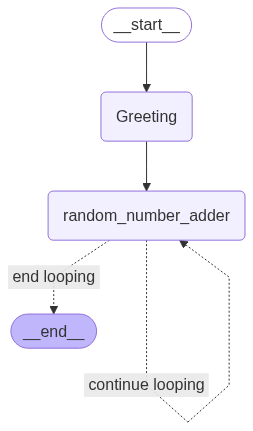

In [18]:
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
result = app.invoke({"name":"Ahmed", "counter":10, "numbers":[]})
result

{'name': 'Hi there, Ahmed', 'numbers': [1, 8, 5, 8, 10], 'counter': 5}